In [0]:
import pandas as pd
import os
import shutil

In [0]:
#Create the data for positive samples 
IMAGE_PATH = "/content/drive/My Drive/images"

In [27]:
df = pd.read_csv('metadata.csv')
print(df.shape)

(372, 29)


In [28]:
df.head()

,patientid,offset,sex,age,finding,survival,intubated,intubation_present,went_icu,in_icu,needed_supplemental_O2,extubated,temperature,pO2_saturation,leukocyte_count,neutrophil_count,lymphocyte_count,view,modality,date,location,folder,filename,doi,url,license,clinical_notes,other_notes,Unnamed: 28
0,2,0.0,M,65.0,COVID-19,Y,NaN,NaN,NaN,NaN,Y,NaN,NaN,NaN,NaN,NaN,NaN,PA,X-ray,"January 22, 2020","Cho Ray Hospital, Ho Chi Minh City, Vietnam",images,auntminnie-a-2020_01_28_23_51_6665_2020_01_28_...,10.1056/nejmc2001272,https://www.nejm.org/doi/full/10.1056/NEJMc200...,NaN,"On January 22, 2020, a 65-year-old man with a ...",NaN,NaN
1,2,3.0,M,65.0,COVID-19,Y,NaN,NaN,NaN,NaN,Y,NaN,NaN,NaN,NaN,NaN,NaN,PA,X-ray,"January 25, 2020","Cho Ray Hospital, Ho Chi Minh City, Vietnam",images,auntminnie-b-2020_01_28_23_51_6665_2020_01_28_...,10.1056/nejmc2001272,https://www.nejm.org/doi/full/10.1056/NEJMc200...,NaN,"On January 22, 2020, a 65-year-old man with a ...",NaN,NaN
2,2,5.0,M,65.0,COVID-19,Y,NaN,NaN,NaN,NaN,Y,NaN,NaN,NaN,NaN,NaN,NaN,PA,X-ray,"January 27, 2020","Cho Ray Hospital, Ho Chi Minh City, Vietnam",images,auntminnie-c-2020_01_28_23_51_6665_2020_01_28_...,10.1056/nejmc2001272,https://www.nejm.org/doi/full/10.1056/NEJMc200...,NaN,"On January 22, 2020, a 65-year-old man with a ...",NaN,NaN
3,2,6.0,M,65.0,COVID-19,Y,NaN,NaN,NaN,NaN,Y,NaN,NaN,NaN,NaN,NaN,NaN,PA,X-ray,"January 28, 2020","Cho Ray Hospital, Ho Chi Minh City, Vietnam",images,auntminnie-d-2020_01_28_23_51_6665_2020_01_28_...,10.1056/nejmc2001272,https://www.nejm.org/doi/full/10.1056/NEJMc200...,NaN,"On January 22, 2020, a 65-year-old man with a ...",NaN,NaN
4,4,0.0,F,52.0,COVID-19,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,PA,X-ray,"January 25, 2020","Changhua Christian Hospital, Changhua City, Ta...",images,nejmc2001573_f1a.jpeg,10.1056/NEJMc2001573,https://www.nejm.org/doi/full/10.1056/NEJMc200...,NaN,diffuse infiltrates in the bilateral lower lungs,NaN,NaN


# Load Datasets

In [0]:
TARGET_DIR = "/content/drive/My Drive/Dataset/Train/Covid"

if not os.path.exists(TARGET_DIR):
    os.mkdir(TARGET_DIR)
    

In [33]:
#Copy COVID-19 images with view point PA from Downloaded directory to Target Directory
cnt = 0
for(i,row) in df.iterrows():
    if row["finding"] == "COVID-19" and row["view"] =="PA":
        filename = row["filename"]
        image_path = os.path.join(IMAGE_PATH,filename) #IMAGE_PATH + filename
        image_copy_path = os.path.join(TARGET_DIR,filename) #TARGET_DIR + filename
        shutil.copy2(image_path,image_copy_path) #Copy From IMAGE_PATH to TARGET_DIrectory
        print("Moving Image",cnt)
        cnt+=1
print(cnt)

Moving Image 0
Moving Image 1
Moving Image 2
Moving Image 3
Moving Image 4
Moving Image 5
Moving Image 6
Moving Image 7
Moving Image 8
Moving Image 9
Moving Image 10
Moving Image 11
Moving Image 12
Moving Image 13
Moving Image 14
Moving Image 15
Moving Image 16
Moving Image 17
Moving Image 18
Moving Image 19
Moving Image 20
Moving Image 21
Moving Image 22
Moving Image 23
Moving Image 24
Moving Image 25
Moving Image 26
Moving Image 27
Moving Image 28
Moving Image 29
Moving Image 30
Moving Image 31
Moving Image 32
Moving Image 33
Moving Image 34
Moving Image 35
Moving Image 36
Moving Image 37
Moving Image 38
Moving Image 39
Moving Image 40
Moving Image 41
Moving Image 42
Moving Image 43
Moving Image 44
Moving Image 45
Moving Image 46
Moving Image 47
Moving Image 48
Moving Image 49
Moving Image 50
Moving Image 51
Moving Image 52
Moving Image 53
Moving Image 54
Moving Image 55
Moving Image 56
Moving Image 57
Moving Image 58
Moving Image 59
Moving Image 60
Moving Image 61
Moving Image 62
Mo

In [0]:
# Normal chest X rays from Kaggle Data.

import random
KAGGLE_FILE_PATH = "Desktop\\chest_xray\\train\\NORMAL"
TARGET_NORMAL_DIR = "/content/drive/My Drive/Dataset/Train/Normal"
if not os.path.exists(TARGET_NORMAL_DIR):
    os.mkdir(TARGET_NORMAL_DIR)
    
    
image_names = os.listdir(KAGGLE_FILE_PATH) #COntains list of all image names
image_names
random.shuffle(image_names) #it will randomly shuffle names in list

for i in range(141):
    image_name = image_names[i]
    image_path = os.path.join(KAGGLE_FILE_PATH,image_name)
    
    target_path = os.path.join(TARGET_NORMAL_DIR,image_name)
    shutil.copy2(image_path,target_path)
    print("Moved",i)

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
TRAIN_PATH ="/content/drive/My Drive/Dataset/Train"
VAL_PATH = "/content/drive/My Drive/Dataset/Val"

# **Importing Required Libraries**

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.layers import *
from keras.models import *
from keras.preprocessing import image

Using TensorFlow backend.


# **Building Architecture**


In [0]:
model = Sequential()
model.add(Conv2D(32,kernel_size=(3,3),activation="relu",input_shape=(224,224,3)))

model.add(Conv2D(64,(3,3),activation="relu"))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64,(3,3),activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(128,(3,3),activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(128,(3,3),activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(64,activation="relu"))
model.add(Dropout(0.5))

model.add(Dense(1,activation="sigmoid"))

model.compile(loss=keras.losses.binary_crossentropy,optimizer = "adam",metrics=["accuracy"])


In [5]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 222, 222, 32)      896       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 220, 220, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 110, 110, 64)      0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 110, 110, 64)      0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 108, 108, 64)      36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 54, 54, 64)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 54, 54, 64)       

## *Data Augmentation*

In [0]:
train_datagen = image.ImageDataGenerator(
    rescale = 1./255,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
)
test_dataset = image.ImageDataGenerator(rescale = 1./255)


In [7]:
train_generator = train_datagen.flow_from_directory(
    '/content/drive/My Drive/Dataset/Train',
    target_size = (224,224),
    batch_size = 32,
    class_mode = 'binary'
)

Found 230 images belonging to 2 classes.


In [8]:
train_generator.class_indices

{'Covid': 0, 'Normal': 1}

In [9]:
validation_generator = test_dataset.flow_from_directory(
    '/content/drive/My Drive/Dataset/Val',
    target_size = (224,224),
    batch_size = 32,
    class_mode = 'binary'
)

Found 50 images belonging to 2 classes.


# **Fit The Model**

In [10]:
hist = model.fit_generator(
    train_generator,
    steps_per_epoch = 8,
    epochs = 10,
    validation_data = validation_generator,
    validation_steps = 2
)

Epoch 1/10
8/8 [==============================] - 179s 22s/step - loss: 0.8587 - accuracy: 0.5261 - val_loss: 0.6933 - val_accuracy: 0.5000
Epoch 2/10
8/8 [==============================] - 8s 1s/step - loss: 0.6903 - accuracy: 0.5348 - val_loss: 0.6920 - val_accuracy: 0.5000
Epoch 3/10
8/8 [==============================] - 9s 1s/step - loss: 0.6526 - accuracy: 0.6391 - val_loss: 0.6227 - val_accuracy: 0.9600
Epoch 4/10
8/8 [==============================] - 9s 1s/step - loss: 0.4976 - accuracy: 0.7435 - val_loss: 0.4181 - val_accuracy: 0.9600
Epoch 5/10
8/8 [==============================] - 9s 1s/step - loss: 0.3209 - accuracy: 0.8957 - val_loss: 0.1838 - val_accuracy: 0.9200
Epoch 6/10
8/8 [==============================] - 9s 1s/step - loss: 0.3156 - accuracy: 0.9087 - val_loss: 0.0912 - val_accuracy: 0.9600
Epoch 7/10
8/8 [==============================] - 9s 1s/step - loss: 0.2250 - accuracy: 0.9217 - val_loss: 0.2611 - val_accuracy: 0.9400
Epoch 8/10
8/8 [======================

In [0]:
model.save("Covid19_XrayDetector.h5")

In [12]:
 model.evaluate_generator(train_generator)

[0.02655816078186035, 0.991304337978363]

In [13]:
 model.evaluate_generator(validation_generator)

[0.19179965555667877, 0.9599999785423279]

# **Test Images**

In [0]:
model = load_model("Covid19_XrayDetector.h5")

In [0]:
import os

In [16]:
train_generator.class_indices

{'Covid': 0, 'Normal': 1}

# **Confusion Matrix**

In [0]:
y_actual = []
y_test = []

In [0]:
for i in os.listdir("/content/drive/My Drive/Dataset/Val/Normal"):
  img = image.load_img("/content/drive/My Drive/Dataset/Val/Normal/"+i,target_size=(224,224))
  img = image.img_to_array(img)
  img = np.expand_dims(img,axis=0)
  p = model.predict_classes(img)
  y_test.append(p[0,0])
  y_actual.append(1)

In [0]:
for i in os.listdir("/content/drive/My Drive/Dataset/Val/Covid"):
  img = image.load_img("/content/drive/My Drive/Dataset/Val/Covid/"+i,target_size=(224,224))
  img = image.img_to_array(img)
  img = np.expand_dims(img,axis=0)
  p = model.predict_classes(img)
  y_test.append(p[0,0])
  y_actual.append(0)

In [0]:
y_actual = np.array(y_actual)
y_test = np.array(y_test)

In [0]:
from sklearn.metrics import confusion_matrix

In [0]:

cm = confusion_matrix(y_actual,y_test)

In [23]:
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


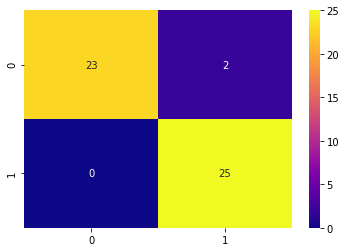

In [24]:
 sns.heatmap(cm,cmap = "plasma",annot=True )

In [0]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
class_names = ["Covid-19","Normal"]

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap="plasma"):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

## ***Confusion Matrix***

Confusion matrix, without normalization
[[23  2]
 [ 0 25]]


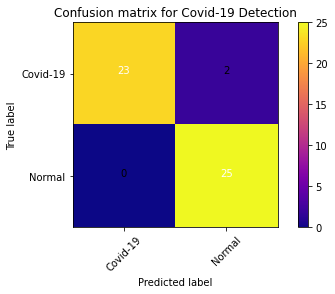

In [26]:
plt.figure()
plot_confusion_matrix(cm, classes=class_names,
                      title='Confusion matrix for Covid-19 Detection')


In [27]:

history = hist
print(history.history.keys())

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


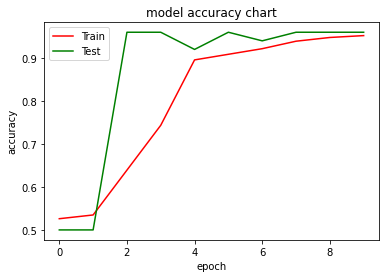

In [28]:

plt.plot(history.history['accuracy'],'red')
plt.plot(history.history['val_accuracy'],'green')
plt.title('model accuracy chart')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


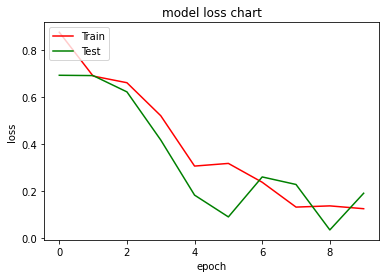

In [29]:

plt.plot(history.history['loss'],'red')
plt.plot(history.history['val_loss'],'green')
plt.title('model loss chart')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# **Predictions from X-Ray Images**

Actual: Negative covid-19 


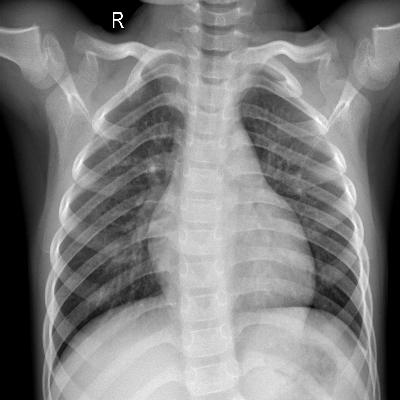

[[1]]
Prediction  :  Negative Covid-19


In [30]:
import numpy as np
from google.colab.patches import cv2_imshow
import cv2
from keras.preprocessing import image



xtest_image = image.load_img('/content/drive/My Drive/Dataset/Predictior_Image/IM-0569-0001.jpeg', target_size = (224, 224))
xtest_image = image.img_to_array(xtest_image)
xtest_image = np.expand_dims(xtest_image, axis = 0)
results = model.predict_classes(xtest_image)



imggg = cv2.imread('/content/drive/My Drive/Dataset/Predictior_Image/IM-0569-0001.jpeg')
print("Actual: Negative covid-19 ")
imggg = np.array(imggg)
imggg = cv2.resize(imggg,(400,400))
#plt.imshow(imggg)
cv2_imshow(imggg)
print(results)
if results[0][0] == 0:
    prediction = 'Positive Covid-19'
else:
    prediction = 'Negative Covid-19'
print("Prediction  : ",prediction)

Actual:Positive covid-19


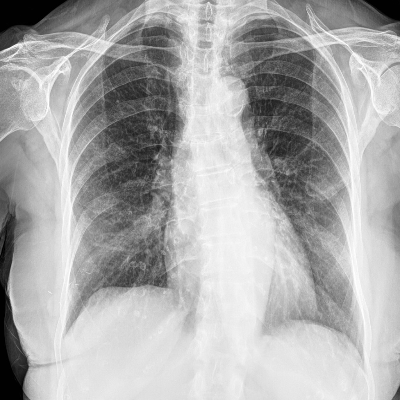

[[0]]
Prediction  :  Positive  Covid-19


In [31]:
import numpy as np
from google.colab.patches import cv2_imshow
from keras.preprocessing import image
xtest_image = image.load_img('/content/drive/My Drive/Dataset/Predictior_Image/test_image.jpeg', target_size = (224, 224))
xtest_image = image.img_to_array(xtest_image)
xtest_image = np.expand_dims(xtest_image, axis = 0)
results = model.predict_classes(xtest_image)
# training_set.class_indices

imggg = cv2.imread('/content/drive/My Drive/Dataset/Predictior_Image/test_image.jpeg')
print("Actual:Positive covid-19")
imggg = np.array(imggg)
imggg = cv2.resize(imggg,(400,400))

#plt.imshow(imggg)
cv2_imshow(imggg)
print(results)
if results[0][0] == 0:
    prediction = 'Positive  Covid-19'
else:
    prediction = 'Negative  Covid-19'
print("Prediction  : ",prediction)